In [2]:
using Pkg
Pkg.activate("/home/laurent/PIML4Power.jl")
using PIML4Power
using Flux
using HDF5
using Dates
using Plots
using LinearAlgebra

  Activating environment at `~/PIML4Power.jl/Project.toml`


In [3]:
# import data
cn = "118"
data, mat, id = load_data("/home/laurent/Dropbox/Research/PIML Julia/data/dataset_" * cn * "_case_3.h5");
#data, mat, id = load_data("/home/laurent/PIML4Power.jl/data/test_data_set.h5");
#println(size(data.v))

In [5]:
ptdf = PIML4Power.build_PTDF_matrix(data.b, mat)

179×118 Matrix{Float64}:
 -0.377315     0.262272    -0.224267    …   0.0400029    0.00165023
 -0.614211    -0.253798     0.232741       -0.0315283    0.00682435
 -0.36884     -0.729253    -0.215792        0.0484774    0.0101248
 -0.390881    -0.195545    -0.47383        -0.0750796    0.0121779
 -0.214855    -0.0497784   -0.284955        0.0520259    0.00312098
 -0.0247061   -0.0760279   -0.0029125   …  -0.107678     0.0146951
  0.0331807    0.0845024    0.0113871       0.116153    -0.00622049
  0.0523163    0.110617     0.0275593       0.146571    -0.0142542
 -0.495799    -0.467819    -0.507681       -0.450563     0.0575546
  0.0363706    0.0941038    0.0118544       0.129708    -0.00795279
  0.0607909    0.119091     0.0360339   …   0.155046    -0.00577962
  0.0692655    0.127566     0.0445084       0.16352      0.00269496
 -0.0169492   -0.0169492   -0.0169492      -0.0169492   -0.0169492
  ⋮                                     ⋱               
 -0.0105707   -0.0105707   -0.0105707   

In [27]:
i = rand(1:size(data.v,2)) # select a random sample
dc_pij = ptdf * data.p[:,i]
pij, _, _, _ = PIML4Power.compute_power_flows(data.b, data.g, data.th[:,i], data.v[:,i], mat);

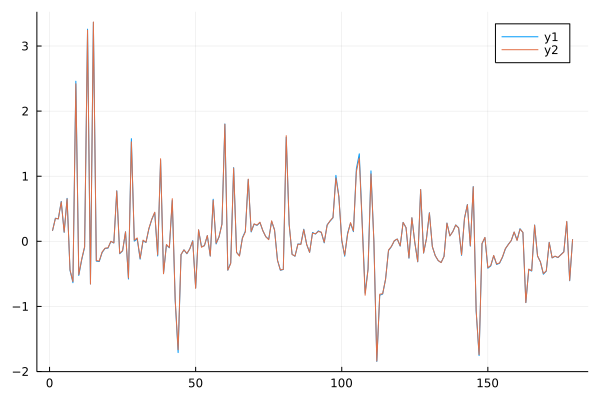

In [29]:
plot(dc_pij)
plot!(pij)

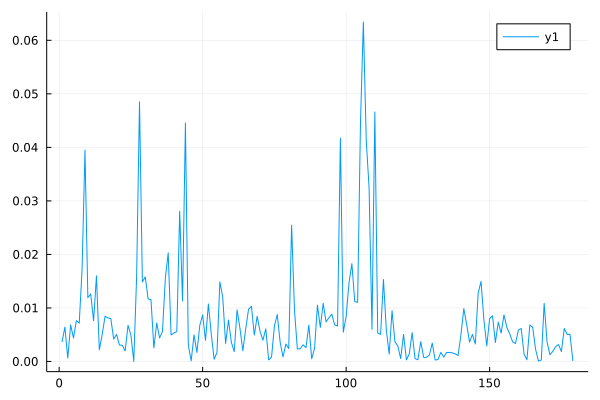

In [33]:
plot(abs.(dc_pij - pij))